<a href="https://colab.research.google.com/github/sterlinggutterman/Final-Project/blob/main/linear_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Models - Results part 1

In [22]:
! git clone https://www.github.com/sterlinggutterman/Final-Project

fatal: destination path 'Final-Project' already exists and is not an empty directory.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_parquet('/content/Final-Project/full_df (2).parquet')
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,reordered_yes/no,order_day,total_order_count,product_name,aisle_id,department_id,aisle,department
0,361493,27,prior,1,3,9,NaN,25718,1,0,no,tuesday,81,Cold Brew Coffee,26,7,coffee,beverages
1,1662354,27,prior,2,2,17,6.0,30776,1,0,no,monday,81,Organic Raw Kombucha Gingerade,31,7,refrigerated,beverages
2,1662354,27,prior,2,2,17,6.0,9604,2,0,no,monday,81,Hibiscus Organic Raw Kombucha,31,7,refrigerated,beverages
3,1662354,27,prior,2,2,17,6.0,6287,3,0,no,monday,81,Organic & Raw Strawberry Serenity Kombucha,31,7,refrigerated,beverages
4,1662354,27,prior,2,2,17,6.0,20947,4,0,no,monday,81,Passionberry Bliss Kombucha Drink,31,7,refrigerated,beverages


# EDA

In [47]:
df.dtypes

,0
order_id,int64
user_id,int64
eval_set,object
order_number,int64
order_dow,int64
order_hour_of_day,int64
days_since_prior_order,float64
product_id,int64
add_to_cart_order,int64
reordered,int64


In [51]:
# cross-tabulation of days since prior and department
pd.crosstab(df['days_since_prior_order'],df['department'])

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,1060,1357,5068,13105,3396,340,4100,24362,4714,3010,...,2795,1736,2081,173,201,9833,1759,202,47012,13796
1.0,2305,3696,12075,30436,6824,526,9016,55631,9321,6837,...,6576,3133,5540,555,403,21706,4252,610,102326,29150
2.0,2398,7446,16062,38116,8714,610,11555,77712,12820,9721,...,8254,3541,8305,666,481,26209,5593,998,142893,37778
3.0,1858,8480,16568,36504,9215,592,11539,81388,13109,10054,...,8061,3177,8310,727,524,24373,5192,1057,144217,37308
4.0,1371,6679,13415,29550,7876,471,8852,67185,10704,7843,...,6202,2511,6510,570,442,18638,3928,717,114048,30897
5.0,739,4759,9030,20369,5315,330,5840,45637,7342,5071,...,4075,1669,4224,356,228,12498,2498,420,75000,21081
6.0,599,2956,5970,14026,3732,210,3834,30122,4924,3323,...,2708,1071,2678,246,164,8125,1635,321,48273,14679
7.0,552,1942,4330,10407,2991,167,2916,22546,3604,2401,...,2014,792,1893,151,122,5900,1167,239,35917,10812
8.0,196,915,2020,4449,1259,67,1318,10066,1656,1113,...,1020,384,1070,80,57,2829,637,147,17025,4680


In [57]:
# cross-tabulation of days since prior and reorders
pd.crosstab(df['days_since_prior_order'],df['order_day'])

order_day,friday,monday,saturday,sunday,thursday,tuesday,wednesday
days_since_prior_order,,,,,,,
0.0,13928,20529,16917,29493,23174,20380,22915
1.0,31687,61271,35341,40833,50792,56209,51266
2.0,46205,57158,61454,52159,71471,82796,72481
3.0,51056,45840,65730,82415,68077,60115,73412
4.0,40634,56884,54177,73414,54375,34970,43684
5.0,26395,39551,35902,54538,28580,32691,21847
6.0,20944,25088,24817,34013,13984,20555,18881
7.0,11329,15194,19620,27804,15569,13664,13674
8.0,5118,10749,7024,9616,6724,7818,7023


In [52]:
group = 'department'
var = 'days_since_prior_order'
df.loc[:,[group, var]].groupby(group).mean()

,days_since_prior_order
department,
alcohol,3.230084
babies,3.984491
bakery,3.783104
beverages,3.682999
breakfast,3.823230
bulk,3.464430
canned goods,3.626185
dairy eggs,3.844003
deli,3.803610


In [58]:
group = 'order_day'
var = 'days_since_prior_order'
df.loc[:,[group, var]].groupby(group).mean()

,days_since_prior_order
order_day,
friday,3.888866
monday,3.802638
saturday,3.995510
sunday,4.092941
thursday,3.466639
tuesday,3.453142
wednesday,3.409978


In [49]:
# cross-tabulation of days of week and department
pd.crosstab(df['order_day'],df['department'])

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_day,,,,,,,,,,,,,,,,,,,,,
friday,1028,4995,9821,19249,4702,347,7661,45536,7935,6377,...,4738,2174,5577,427,323,15893,3145,518,86208,20136
monday,1609,5541,12645,31743,7866,515,8848,63725,10430,7296,...,6849,2785,5974,528,410,19798,4215,745,109707,32398
saturday,949,6697,13024,23052,6269,476,10311,60220,10694,8675,...,5578,2850,7165,577,333,19492,3847,749,115913,25495
sunday,1516,6941,16084,38844,10034,629,10424,79161,12700,8871,...,7658,3258,7231,572,460,22623,4731,831,136927,39056
thursday,2403,5337,12894,31908,7868,489,8079,65455,10671,6550,...,6395,2488,5851,528,377,19195,3953,703,107238,31588
tuesday,1746,5528,12319,31522,7667,485,8531,62549,10006,7446,...,6394,2870,5628,523,432,19777,4339,747,106727,31325
wednesday,2310,5388,12620,31019,7690,517,8158,62118,9808,7174,...,6479,2492,5676,529,416,19474,3936,721,104817,30627


In [59]:
# cross-tabulation of days of week and reorders
pd.crosstab(df['order_day'],df['reordered_yes/no'])

reordered_yes/no,no,yes
order_day,,
friday,64861,197974
monday,80203,271339
saturday,80557,261740
sunday,93421,335841
thursday,77808,270258
tuesday,79220,265687
wednesday,77382,262853


# Single Linear Regression

### Days since prior order

#### Days since prior order regressed on department

In [25]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)

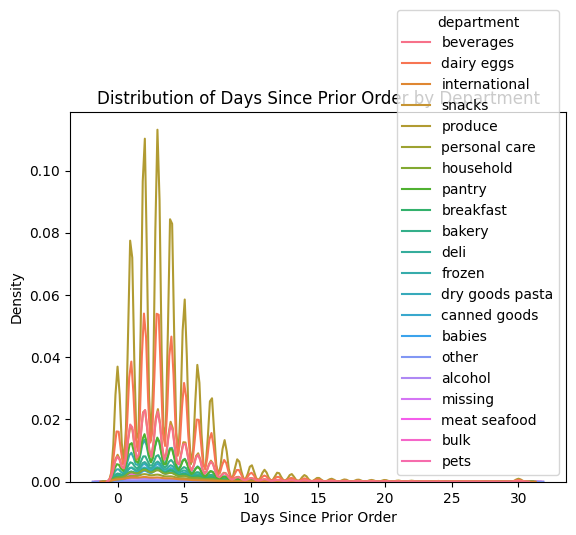

In [30]:
# kernal density plot
sns.kdeplot(data=df, x='days_since_prior_order', hue='department')
plt.title('Distribution of Days Since Prior Order by Department')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Density')
plt.show()

In [31]:
x_d = pd.get_dummies(df['department'], dtype='int')
y = df['days_since_prior_order']

In [32]:
# regression
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression(fit_intercept=False).fit(x_d, y)

# coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
print('R-squared: ', reg_model.score(x_d, y))
result

R-squared:  0.0010202953791734748


,variable,coefficient
0,alcohol,3.230084
1,babies,3.984491
2,bakery,3.783104
3,beverages,3.682999
4,breakfast,3.823230
5,bulk,3.464430
6,canned goods,3.626185
7,dairy eggs,3.844003
8,deli,3.803610
9,dry goods pasta,3.782111


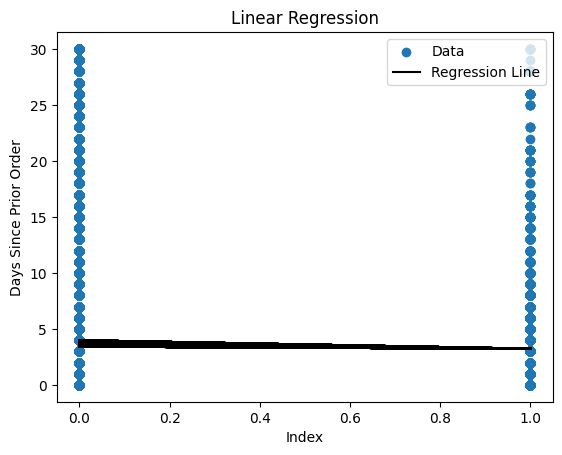

In [36]:
# scatter plot of fit:
plt.scatter(x_d.iloc[:, 0], y, label='Data')
plt.plot(x_d.iloc[:, 0], reg_model.predict(x_d), label='Regression Line', color='black')
plt.xlabel("Index")
plt.ylabel("Days Since Prior Order")
plt.legend(loc='upper right')
plt.title('Linear Regression')

plt.show()

#### Days since prior order regressed on order day

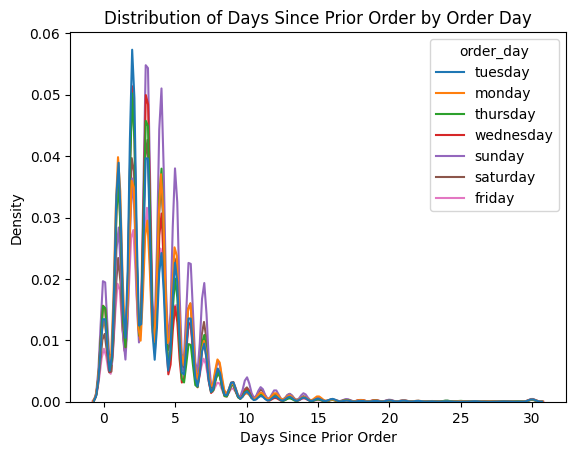

In [38]:
# kernal density plot
sns.kdeplot(data=df, x='days_since_prior_order', hue='order_day')
plt.title('Distribution of Days Since Prior Order by Order Day')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Density')
plt.show()

In [40]:
x_d = pd.get_dummies(df['order_day'], dtype='int')
y = df['days_since_prior_order']

# regression
reg_model = LinearRegression(fit_intercept=False).fit(x_d, y)

# coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
print('R-squared: ', reg_model.score(x_d, y))
result

R-squared:  0.00736240198634408


,variable,coefficient
0,friday,3.888866
1,monday,3.802638
2,saturday,3.995510
3,sunday,4.092941
4,thursday,3.466639
5,tuesday,3.453142
6,wednesday,3.409978


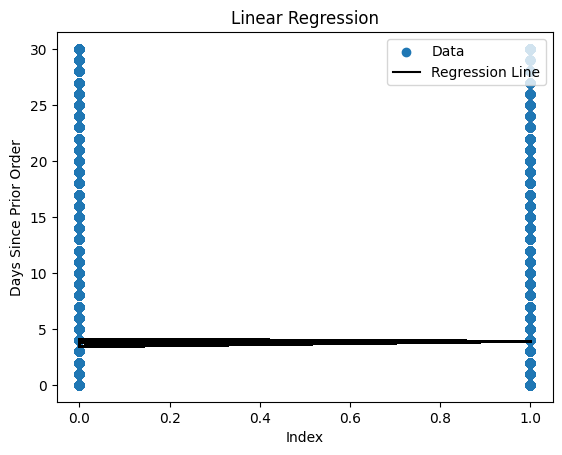

In [41]:
# scatter plot of fit:
plt.scatter(x_d.iloc[:, 0], y, label='Data')
plt.plot(x_d.iloc[:, 0], reg_model.predict(x_d), label='Regression Line', color='black')
plt.xlabel("Index")
plt.ylabel("Days Since Prior Order")
plt.legend(loc='upper right')
plt.title('Linear Regression')

plt.show()

## Reordered

#### Reordered regressed on department

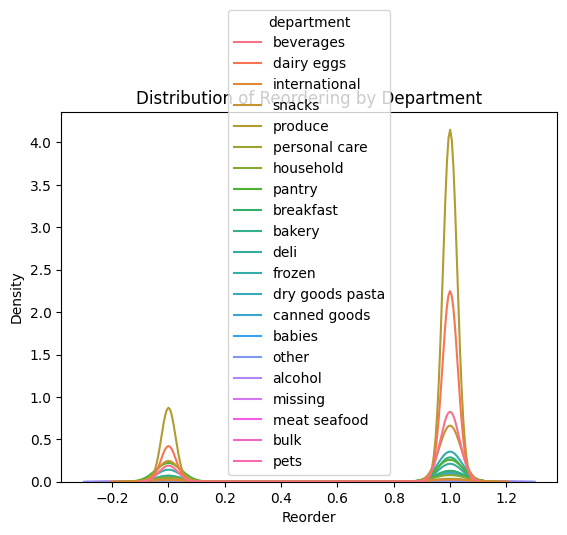

In [42]:
# kernal density plot
sns.kdeplot(data=df, x='reordered', hue='department')
plt.title('Distribution of Reordering by Department')
plt.xlabel('Reorder')
plt.ylabel('Density')
plt.show()

In [17]:
x_d = pd.get_dummies(df['department'], dtype='int')
y = df['reordered']

# regression
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression(fit_intercept=False).fit(x_d, y)

# coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
print('R-squared: ', reg_model.score(x_d, y))
result

R-squared:  0.045411893520771573


,variable,coefficient
0,alcohol,0.790762
1,babies,0.735523
2,bakery,0.799233
3,beverages,0.813246
4,breakfast,0.745067
5,bulk,0.733950
6,canned goods,0.648665
7,dairy eggs,0.842353
8,deli,0.782072
9,dry goods pasta,0.641375


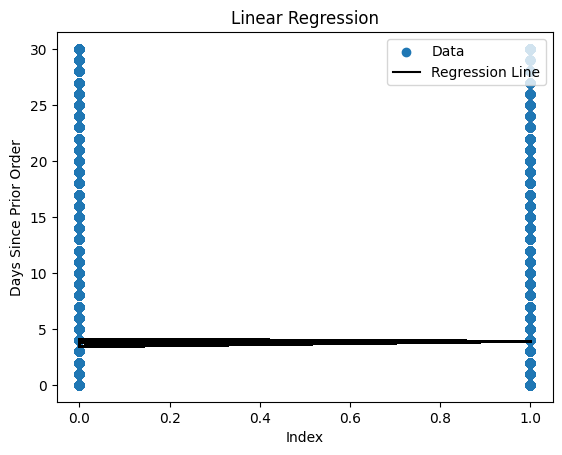

In [43]:
# Scatter plot of fit:
plt.scatter(x_d.iloc[:, 0], y, label='Data') # Use df.index or any relevant single column from df instead of x_d
plt.plot(x_d.iloc[:, 0], reg_model.predict(x_d), label='Regression Line', color='black') # Plot predictions instead of the model itself
plt.xlabel("Index") # Update x-axis label to reflect the change
plt.ylabel("Days Since Prior Order") # Update y-axis label
plt.legend(loc='upper right')
plt.title('Linear Regression')

plt.show()

#### Reordered regressed on order day

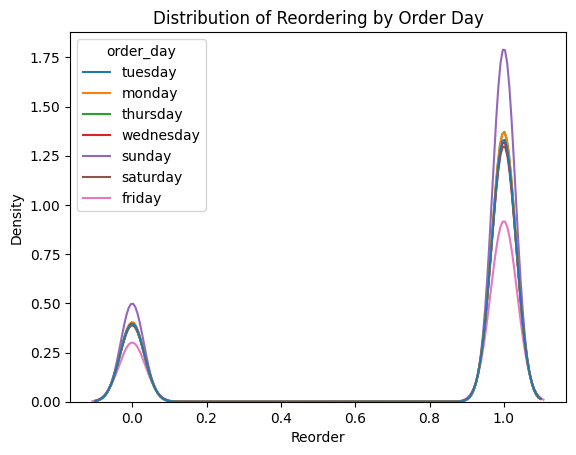

In [44]:
# kernal density plot
sns.kdeplot(data=df, x='reordered', hue='order_day')
plt.title('Distribution of Reordering by Order Day')
plt.xlabel('Reorder')
plt.ylabel('Density')
plt.show()

In [45]:
x_d = pd.get_dummies(df['order_day'], dtype='int')
y = df['reordered']

# regression
reg_model = LinearRegression(fit_intercept=False).fit(x_d, y)

# coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
print('R-squared: ', reg_model.score(x_d, y))
result

R-squared:  0.0003837100094510326


,variable,coefficient
0,friday,0.753225
1,monday,0.771854
2,saturday,0.764658
3,sunday,0.782368
4,thursday,0.776456
5,tuesday,0.770315
6,wednesday,0.772563


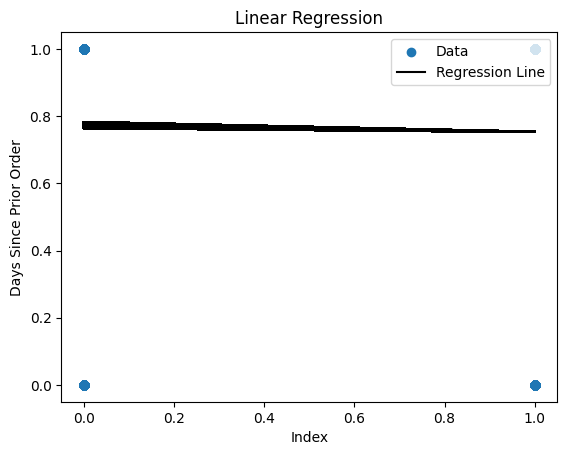

In [46]:
# Scatter plot of fit:
plt.scatter(x_d.iloc[:, 0], y, label='Data')
plt.plot(x_d.iloc[:, 0], reg_model.predict(x_d), label='Regression Line', color='black')
plt.xlabel("Index")
plt.ylabel("Days Since Prior Order")
plt.legend(loc='upper right')
plt.title('Linear Regression')

plt.show()

# Multiple Linear Regression